### Importanto as bibliotecas

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv("../dados/Nike_Sales_Uncleaned.csv")
df.dropna(inplace=True)
df.to_excel("dados_limpos.xlsx", index=False)

### Cabeçalho da planilha

In [115]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
19,2019,Kids,Running,Air Zoom,6,0.0,3424.06,0.32,0.00,2025/01/17,Online,Hyderabad,1915.24
21,2021,Men,Running,Free RN,L,-1.0,7086.70,0.66,-2409.48,2024/11/19,Retail,Hyd,-1120.49
57,2048,Men,Lifestyle,Waffle One,M,3.0,6216.29,0.94,1118.93,2024/09/14,Online,Mumbai,-642.02
63,2063,Women,Basketball,Air Jordan,M,1.0,9751.00,0.16,8190.84,06-09-2024,Retail,Pune,1130.31
71,2071,Kids,Lifestyle,Blazer Mid,M,3.0,7849.81,0.49,12010.21,2025/01/12,Retail,Pune,-882.96


In [116]:
df.columns

Index(['Order_ID', 'Gender_Category', 'Product_Line', 'Product_Name', 'Size',
       'Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Sales_Channel', 'Region', 'Profit'],
      dtype='object')

In [117]:
df.shape

(127, 13)

### Tratando os dados vazios e conferindo tipos de dados

In [118]:
df = df.drop_duplicates()

df = df.fillna(0)

print(df.dtypes)


Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object


### Converter datas (se tiver colunas de data)
### Conferir estatísticas gerais

In [119]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print(df.describe())

          Order_ID  Units_Sold          MRP  Discount_Applied       Revenue  \
count   127.000000  127.000000   127.000000        127.000000    127.000000   
mean   3234.228346    1.582677  6186.602756          0.652047   3366.169370   
min    2003.000000   -1.000000  2042.870000          0.020000  -5010.390000   
25%    2515.500000    0.000000  4652.240000          0.315000    -37.520000   
50%    3189.000000    2.000000  6245.230000          0.630000    596.760000   
75%    3982.500000    3.000000  7929.610000          0.985000   6461.890000   
max    4484.000000    4.000000  9986.170000          1.250000  26105.370000   
std     784.783199    1.630274  2218.221918          0.362420   5947.756952   

                          Order_Date       Profit  
count                             39   127.000000  
mean   2025-02-01 12:18:27.692307712  1299.061890  
min              2024-08-23 00:00:00 -1199.450000  
25%              2024-11-29 00:00:00    17.795000  
50%              2025-01-26 

In [120]:
print(df.dtypes)

Order_ID                     int64
Gender_Category             object
Product_Line                object
Product_Name                object
Size                        object
Units_Sold                 float64
MRP                        float64
Discount_Applied           float64
Revenue                    float64
Order_Date          datetime64[ns]
Sales_Channel               object
Region                      object
Profit                     float64
dtype: object


### Analise de receita X regiao

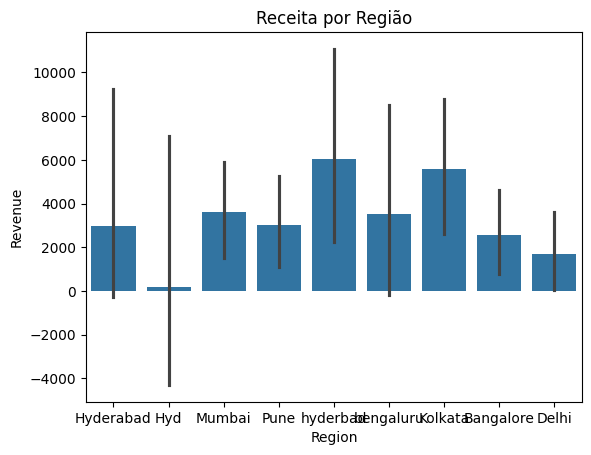

In [121]:

sns.barplot(x='Region', y='Revenue', data=df)
plt.title('Receita por Região')
plt.show()

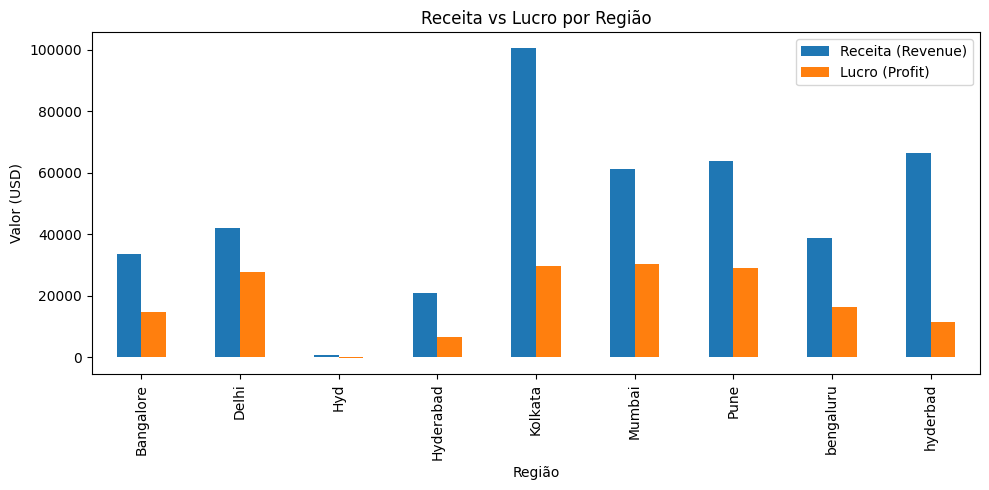

In [122]:
grouped = df.groupby('Region')[['Revenue', 'Profit']].sum().reset_index()

# Plotar
grouped.plot(x='Region', y=['Revenue', 'Profit'], kind='bar', figsize=(10,5))
plt.title('Receita vs Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Valor (USD)')
plt.legend(['Receita (Revenue)', 'Lucro (Profit)'])
plt.tight_layout()
plt.show()

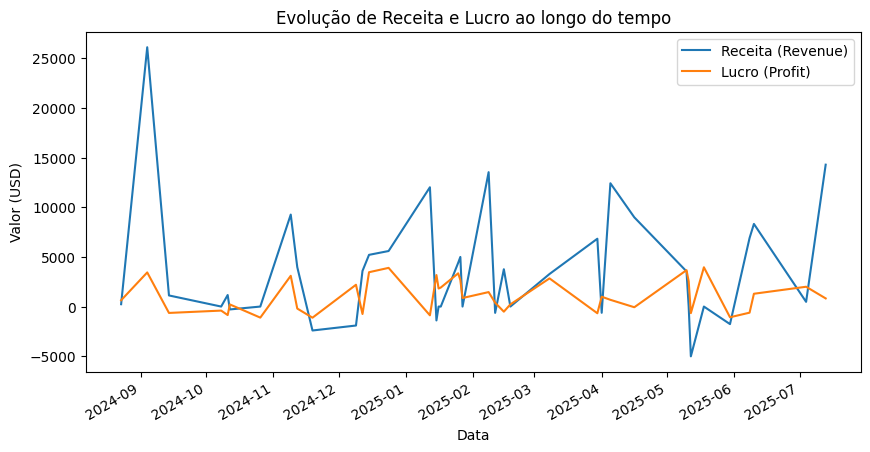

In [123]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

time_data = df.groupby('Order_Date')[['Revenue', 'Profit']].sum()

time_data.plot(figsize=(10,5))
plt.title('Evolução de Receita e Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor (USD)')
plt.legend(['Receita (Revenue)', 'Lucro (Profit)'])
plt.show()

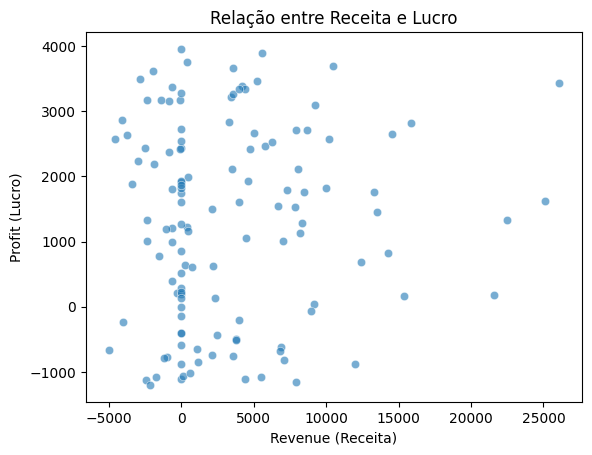

In [124]:
sns.scatterplot(x='Revenue', y='Profit', data=df, alpha=0.6)
plt.title('Relação entre Receita e Lucro')
plt.xlabel('Revenue (Receita)')
plt.ylabel('Profit (Lucro)')
plt.show()

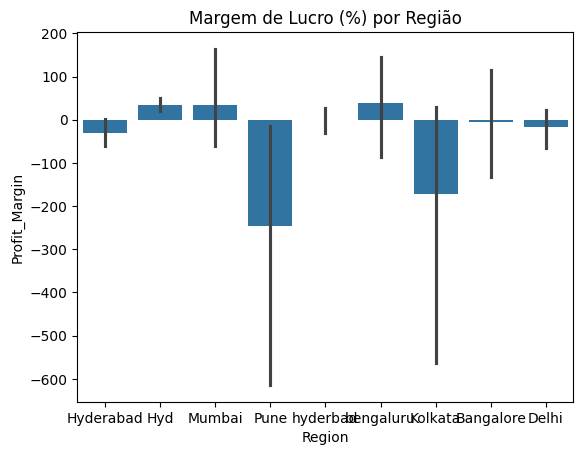

In [125]:
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

sns.barplot(x='Region', y='Profit_Margin', data=df)
plt.title('Margem de Lucro (%) por Região')
plt.show()

| Tipo de gráfico | Mostra o quê                         | Ideal pra                    |
| --------------- | ------------------------------------ | ---------------------------- |
| Barras          | Comparar Receita e Lucro lado a lado | Categorias (região, produto) |
| Linhas          | Evolução no tempo                    | Séries temporais             |
| Dispersão       | Relação entre Receita e Lucro        | Correlação entre variáveis   |
| Margem (%)      | Eficiência do lucro                  | Comparar desempenho          |


=== Estatísticas ===
           Order_ID Gender_Category Product_Line Product_Name  Size  \
count   2500.000000            2500         2500         2500  1990   
unique          NaN               3            5           20    10   
top             NaN            Kids     Training  SuperRep Go     L   
freq            NaN             841          546          148   513   
mean    3194.352400             NaN          NaN          NaN   NaN   
std      749.972638             NaN          NaN          NaN   NaN   
min     2000.000000             NaN          NaN          NaN   NaN   
25%     2534.750000             NaN          NaN          NaN   NaN   
50%     3192.500000             NaN          NaN          NaN   NaN   
75%     3841.250000             NaN          NaN          NaN   NaN   
max     4499.000000             NaN          NaN          NaN   NaN   

         Units_Sold          MRP  Discount_Applied       Revenue  Order_Date  \
count   1265.000000  1246.000000        832.00

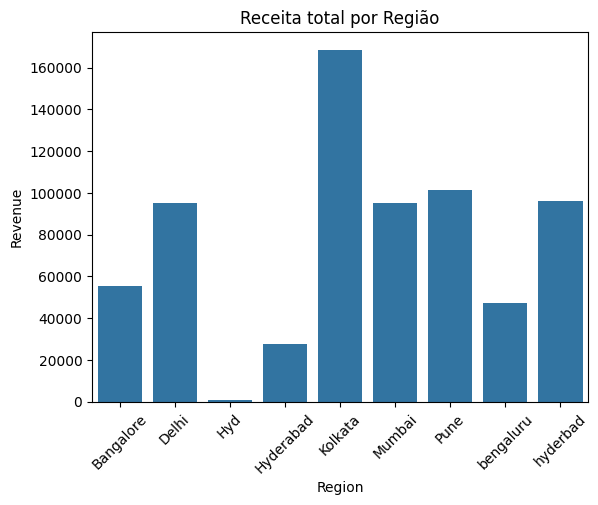

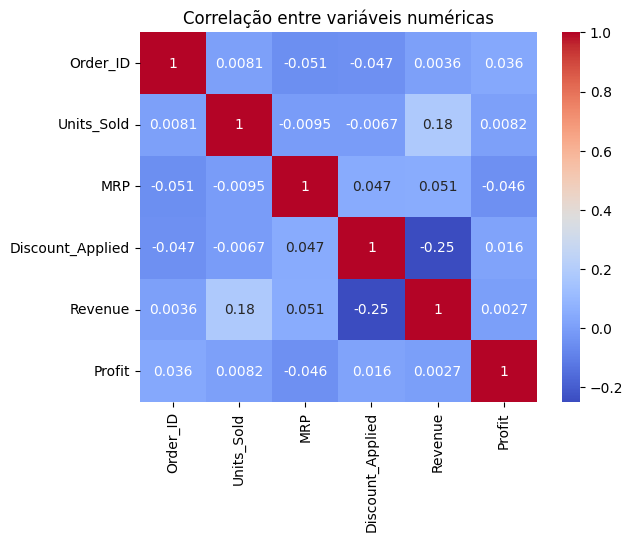

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura do dataset
df = pd.read_csv('../dados/Nike_Sales_Uncleaned.csv')

# 1️⃣ Estatísticas iniciais
print("=== Estatísticas ===")
print(df.describe(include='all'))

# 2️⃣ Contagem por categoria
print("\n=== Produtos por linha ===")
print(df['Product_Line'].value_counts())

# 3️⃣ Receita por região
region_revenue = df.groupby('Region', as_index=False)['Revenue'].sum()
sns.barplot(x='Region', y='Revenue', data=region_revenue)
plt.title('Receita total por Região')
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Correlação entre variáveis numéricas
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [127]:
from scipy.stats import pearsonr, ttest_ind
import statsmodels.api as sm

# Correlação entre receita e lucro
corr, p_value = pearsonr(df['Revenue'], df['Profit'])
print(f"Correlação Revenue-Profit: {corr:.2f}, p-valor: {p_value:.4f}")

# Regressão linear
X = sm.add_constant(df['Revenue'])
model = sm.OLS(df['Profit'], X).fit()
print(model.summary())

Correlação Revenue-Profit: 0.00, p-valor: 0.8930
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01809
Date:                Fri, 14 Nov 2025   Prob (F-statistic):              0.893
Time:                        19:39:58   Log-Likelihood:                -21794.
No. Observations:                2500   AIC:                         4.359e+04
Df Residuals:                    2498   BIC:                         4.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Dados
df = pd.read_csv('../dados/Nike_Sales_Uncleaned.csv')

X = df[['Revenue']]
y = df['Profit']

# 2️⃣ Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Treinamento
model = LinearRegression()
model.fit(X_train, y_train)

# 4️⃣ Previsão
y_pred = model.predict(X_test)

# 5️⃣ Avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Absoluto Médio (MAE): 1258.36
Coeficiente de Determinação (R²): -0.00


In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 1️⃣ Definir modelo e parâmetros
model = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

# 2️⃣ Rodar o GridSearch
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X, y)

# 3️⃣ Resultados
print("Melhores parâmetros:", grid.best_params_)
print("Melhor R²:", grid.best_score_)

Melhores parâmetros: {'max_depth': 3, 'min_samples_split': 10}
Melhor R²: -0.005281290242766223


In [130]:
print(df[['Revenue', 'Profit']].head())
print(df[['Revenue', 'Profit']].corr())

   Revenue   Profit
0      0.0  -770.45
1      0.0  -112.53
2      0.0  3337.34
3      0.0  3376.85
4      0.0   187.89
          Revenue    Profit
Revenue  1.000000  0.002691
Profit   0.002691  1.000000


In [131]:
# Remover símbolos e converter
df['Revenue'] = (
    df['Revenue']
    .astype(str)
    .str.replace('[^0-9.,]', '', regex=True)   # remove cifrão e letras
    .str.replace(',', '.')                     # troca vírgula por ponto
    .astype(float)
)


In [132]:
df['Profit'] = (
    df['Profit']
    .astype(str)
    .str.replace('[^0-9.,-]', '', regex=True)
    .str.replace(',', '.')
    .astype(float)
)


In [133]:
print(df[['Revenue', 'Profit']].corr())


         Revenue   Profit
Revenue  1.00000 -0.00485
Profit  -0.00485  1.00000


In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 1️⃣ Definir modelo e parâmetros
model = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

# 2️⃣ Rodar o GridSearch
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X, y)

# 3️⃣ Resultados
print("Melhores parâmetros:", grid.best_params_)
print("Melhor R²:", grid.best_score_)

Melhores parâmetros: {'max_depth': 3, 'min_samples_split': 10}
Melhor R²: -0.005281290242766223


In [135]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Product_Line'], drop_first=True)


In [136]:
print(df.dtypes)

Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object


In [137]:
df = pd.get_dummies(df, columns=['Region', 'Product_Line', 'Gender_Category'], drop_first=True)


In [138]:
df = pd.get_dummies(df, columns=['Sales_Channel'], drop_first=True)


In [139]:
df = df.drop(['Product_Name', 'Size', 'Order_Date'], axis=1)


In [140]:
X = df.drop('Profit', axis=1)
y = df['Profit']


In [141]:
# 🔍 Verificar colunas com texto
print("Colunas categóricas (texto):")
print(X_train.select_dtypes(include='object').columns)

# 🧹 Remover colunas que não fazem sentido para o modelo
colunas_remover = ['Order_Date', 'Product_Name', 'Size']

for col in colunas_remover:
    if col in X_train.columns:
        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)

# 🔄 Codificar as colunas categóricas restantes
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 🧩 Garantir que as colunas de treino e teste fiquem iguais
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("✅ Todas as colunas agora são numéricas!")
print(X_train.dtypes.head())


Colunas categóricas (texto):
Index([], dtype='object')
✅ Todas as colunas agora são numéricas!
Revenue    float64
dtype: object


In [142]:
print(X_train.select_dtypes(include='object').columns)


Index([], dtype='object')


In [143]:
# 🔍 Verificar colunas com texto
print("Colunas categóricas (texto):")
print(X_train.select_dtypes(include='object').columns)

# 🧹 Remover colunas que não fazem sentido para o modelo
colunas_remover = ['Order_Date', 'Product_Name', 'Size']

for col in colunas_remover:
    if col in X_train.columns:
        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)

# 🔄 Codificar as colunas categóricas restantes
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 🧩 Garantir que as colunas de treino e teste fiquem iguais
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("✅ Todas as colunas agora são numéricas!")
print(X_train.dtypes.head())


Colunas categóricas (texto):
Index([], dtype='object')
✅ Todas as colunas agora são numéricas!
Revenue    float64
dtype: object


In [144]:
print(X_train.select_dtypes(include='object').columns)


Index([], dtype='object')


In [145]:
colunas_remover = ['Order_Date', 'Product_Name', 'Size']


In [146]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [147]:
print(X_train.dtypes.head())


Revenue    float64
dtype: object


In [148]:
grid.fit(X_train, y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [151]:
df.to_csv("dados_limpos.csv", index=False)